In [538]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [539]:
df = pd.read_csv('data/scores.csv', error_bad_lines=False)

In [540]:
#Got rid of percentage signs

# df['Percent White'] = df['Percent White'].str.rstrip('%').astype('float')/100
# df['Percent Black'] = df['Percent Black'].str.rstrip('%').astype('float')/100
# df['Percent Hispanic'] = df['Percent Hispanic'].str.rstrip('%').astype('float')/100
# df['Percent Asian'] = df['Percent Asian'].str.rstrip('%').astype('float')/100
# df['Percent Tested'] = df['Percent Tested'].str.rstrip('%').astype('float')/100

In [541]:
#gets rid of columns with na values
df = df.dropna()

### First 5 rows of Dataframe

In [542]:
df.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%


### Show description of data set

In [543]:
df.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing)
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,10736.066845,40.742754,-73.923427,756.459893,432.719251,424.342246,418.286096
std,537.245046,0.082434,0.071961,774.287044,71.916833,61.884529,64.548388
min,10002.000000,40.528230,-74.192150,142.000000,317.000000,302.000000,284.000000
25%,10306.000000,40.684780,-73.979260,397.250000,386.000000,386.000000,382.000000
50%,10472.000000,40.739755,-73.927510,482.500000,414.000000,412.500000,402.500000
75%,11217.000000,40.820995,-73.887532,660.500000,457.250000,444.500000,436.000000
max,11694.000000,40.888370,-73.726910,5447.000000,754.000000,697.000000,693.000000


### Show info of data set

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 2 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    374 non-null    object 
 1   School Name                  374 non-null    object 
 2   Borough                      374 non-null    object 
 3   Building Code                374 non-null    object 
 4   Street Address               374 non-null    object 
 5   City                         374 non-null    object 
 6   State                        374 non-null    object 
 7   Zip Code                     374 non-null    int64  
 8   Latitude                     374 non-null    float64
 9   Longitude                    374 non-null    float64
 10  Phone Number                 374 non-null    object 
 11  Start Time                   374 non-null    object 
 12  End Time                     374 non-null    object 
 13  Student Enrollment  

In [545]:
X = df['Average Score (SAT Reading)'].values
y = df['Average Score (SAT Math)'].values

#y2 = df['Average Score (SAT Writing)'].values

In [548]:
X = X.reshape(-1,1)

### Split data into train and test data

In [549]:
# splitting data into 2 seperate groups. training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

### Fit training split into regression model

Text(0.5, 1.0, 'S.A.T. data')

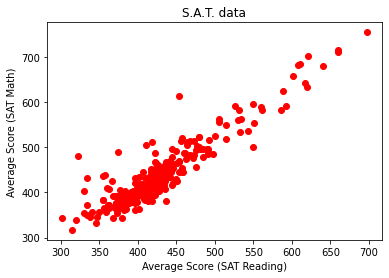

In [550]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Average Score (SAT Reading)')
plt.ylabel('Average Score (SAT Math)')
plt.title('S.A.T. data')

In [551]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

### Show models regression score

In [552]:
print(f'Training Accuracy {round(lm.score(x_train, y_train) * 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test) * 100,2)}%')

Training Accuracy 85.53%
Test Accuracy 88.35%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

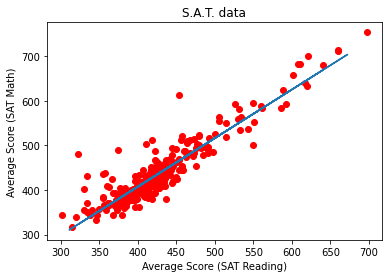

In [553]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test,y_predict)
plt.xlabel('Average Score (SAT Reading)')
plt.ylabel('Average Score (SAT Math)')
plt.title('S.A.T. data')
plt.plot

### Conclusions
I compared the SAT scores and how what students scored in one subject might predict what they score in another.

- readin/writing scores have a very high accuracy. around 96%

- reading/math however are not as closely related. as you can see, its only around 85%

- therefore it is alot more accurate to predict how a student will score in the writing section by looking at their reading scores as opposed to math